## MNIST 손글씨 - CNN v2
- 2 x Conv2D layers
- 1 MaxPooling2D layer
- 1 FCN layer
- 1 Output layer

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2023
np.random.seed(seed)
tf.random.set_seed(seed)

In [19]:
tf.__version__

'2.14.0'

- 데이터 전처리

In [20]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [21]:
# X data의 차원 변경 및 정규화(0~1)
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.


In [22]:
# y_data의 one-hot-encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

- 모델 정의/설정/학습/평가

In [23]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [24]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),             # MaxPooling2D(pool_size=(2,2))
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4719104   
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                      

In [25]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [26]:
!mkdir models
!ls -l

mkdir: cannot create directory ‘models’: File exists
total 8
drwxr-xr-x 2 root root 4096 Nov  8 01:41 models
drwxr-xr-x 1 root root 4096 Nov  6 14:20 sample_data


In [27]:
model_path = 'models/best-mnist-v2.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=5)

In [28]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=256,
    callbacks=[mc, es]
)

Epoch 1/100
186/188 [============================>.] - ETA: 0s - loss: 0.2101 - accuracy: 0.9362
Epoch 1: val_loss improved from inf to 0.06007, saving model to models/best-mnist-v2.h5
188/188 [==============================] - 4s 18ms/step - loss: 0.2088 - accuracy: 0.9366 - val_loss: 0.0601 - val_accuracy: 0.9820
Epoch 2/100
  5/188 [..............................] - ETA: 2s - loss: 0.0544 - accuracy: 0.9828

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


185/188 [============================>.] - ETA: 0s - loss: 0.0497 - accuracy: 0.9845
Epoch 2: val_loss improved from 0.06007 to 0.04818, saving model to models/best-mnist-v2.h5
188/188 [==============================] - 3s 15ms/step - loss: 0.0496 - accuracy: 0.9845 - val_loss: 0.0482 - val_accuracy: 0.9859
Epoch 3/100
187/188 [============================>.] - ETA: 0s - loss: 0.0287 - accuracy: 0.9907
Epoch 3: val_loss improved from 0.04818 to 0.04664, saving model to models/best-mnist-v2.h5
188/188 [==============================] - 3s 15ms/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.0466 - val_accuracy: 0.9867
Epoch 4/100
184/188 [============================>.] - ETA: 0s - loss: 0.0185 - accuracy: 0.9940
Epoch 4: val_loss improved from 0.04664 to 0.04049, saving model to models/best-mnist-v2.h5
188/188 [==============================] - 3s 14ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0405 - val_accuracy: 0.9876
Epoch 5/100
187/188 [============================

In [29]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0348 - accuracy: 0.9892


[0.034762077033519745, 0.9891999959945679]

- 학습과정 시각화

In [30]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

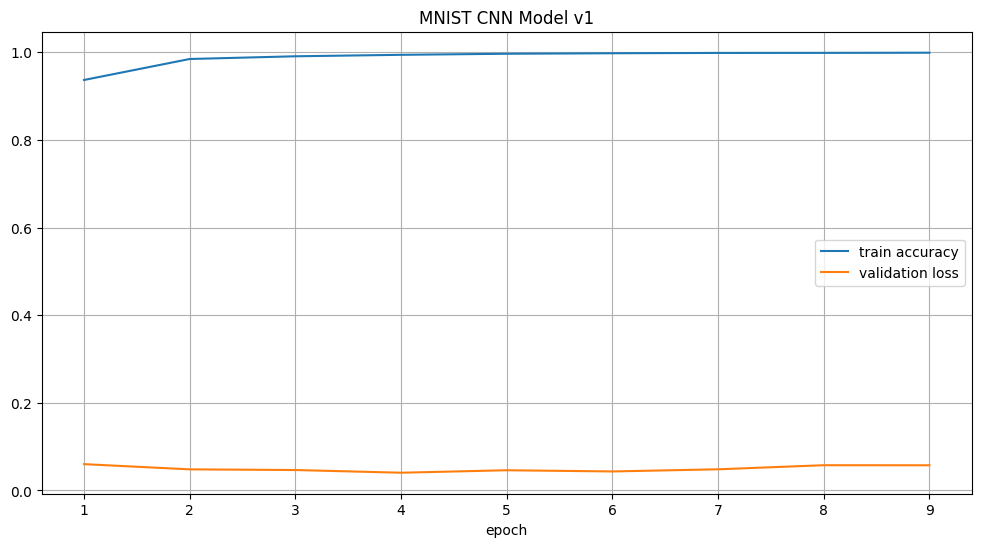

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.title('MNIST CNN Model v2')
plt.show()